# 未読記事
- 


## 読み物
- https://yoheikikuta.github.io/CapsNet/
- ✔http://tekenuko.hatenablog.com/entry/2017/12/10/183414
- ✔https://mosko.tokyo/post/on-capusels/
- https://qiita.com/hiyoko9t/items/f426cba38b6ca1a7aa2b
- https://qiita.com/MuAuan/items/ce29fdc90672dcae5060
- https://qiita.com/onlyzs/items/5096f50a21758a536d9a
- https://gigazine.net/news/20180208-capsnet/
- https://github.com/arXivTimes/arXivTimes/issues/561

### 英語
- https://kndrck.co/posts/capsule_networks_explained/
- https://medium.com/ai%C2%B3-theory-practice-business/understanding-hintons-capsule-networks-part-i-intuition-b4b559d1159b
- https://medium.com/ai%C2%B3-theory-practice-business/understanding-hintons-capsule-networks-part-ii-how-capsules-work-153b6ade9f66
- 

## 実装&読み物
- https://www.codexa.net/capsule-network-keras-mnist-tutorial/
- 

### 英語
- https://hackernoon.com/what-is-a-capsnet-or-capsule-network-2bfbe48769cc
- https://jhui.github.io/2017/11/03/Dynamic-Routing-Between-Capsules/
- https://www.kaggle.com/kmader/capsulenet-on-mnist


## 実装
- https://github.com/naturomics/CapsNet-Tensorflow
- https://github.com/Sarasra/models/tree/master/research/capsules
- https://github.com/XifengGuo/CapsNet-Keras
- https://github.com/Mohit-Ak/CapsNet_notMNIST_affNIST
- https://twitter.com/icoxfog417/status/959252299947192320

## movie
- https://www.youtube.com/watch?v=pPN8d0E3900
- https://www.youtube.com/watch?v=6S1_WqE55UQ
- https://www.youtube.com/watch?v=pPN8d0E3900
- https://www.youtube.com/watch?v=rTawFwUvnLE&feature=youtu.be


## 論文
- https://openreview.net/pdf?id=HJWLfGWRb
- https://arxiv.org/pdf/1710.09829.pdf
- https://arxiv.org/pdf/1712.03480.pdf



# コレ以外の参考
- スライドとpdf
- 黒いノート

# CapNetの勉強会に参加しました
https://izumiotsu-ai.connpass.com/event/86972/　　

初勉強会  
良い会だったので是非参加してみて  

やったこと  
- 
- 
- 




# CNNの種類

- Classfication + Localization←CpasNetはこれ(?)
- Object Detection
- Semantic Segmentation
- Instance Segumentation

https://gigazine.net/news/20180208-capsnet/

# CNNの短所

- 膨大な数の画像を学習させる必要がある
- 画像内にオブジェクトがたくさんあって混雑していると扱えないことがある
- 画像内にある特徴同士の関係性が失われてしまう
- オブジェクトの向き、空間的な特徴の抽出が難しい
- 回転などの差異を識別するためにそのための学習データが必要

- 異なる特徴の相対的な位置関係をとらえられない
- pooling層にようって位置に関する重要な情報を取り去られてる

だからこの下の画像では、両方ともCNNは「人間」と答える。
なぜなら、学習したように目や鼻の特徴はどちらにも見られるから。  

しかし、位置に関する特徴も学習したCapsNetは左の画像は「人間」とは答えない。
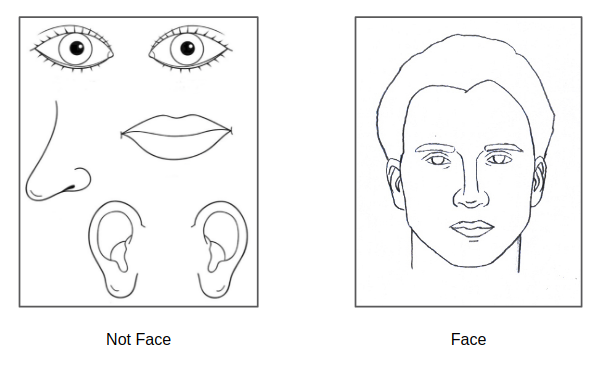

## CNNのプーリング層について
プーリング層があることによって物体のロバスト性は獲得てきますが、  
部位同士の相関関係、位置関係の情報が欠落する  



プーリング層での処理は空間特徴の抽出ではなく、オブジェクトの回転、移動に対する不変性。



# CapsNetとは

ジェフリーヒントンが開発  

論文→https://arxiv.org/abs/1710.09829  

要約
- 従来はスカラーを流していたものをCapsulesという「ベクトル」にした
- 層間のCapsulesの結合をできるようにした
- 実装した
- データ拡張なしにmNISTのテストエラー0.25%を達成した
- affNistやMultiMNISTにおいても良い精度がでた

カプセル」とは、ベクトルが流れるニューラルネット内のニューロン  
ニューロンの集合

# CNNとCapsNetの比較

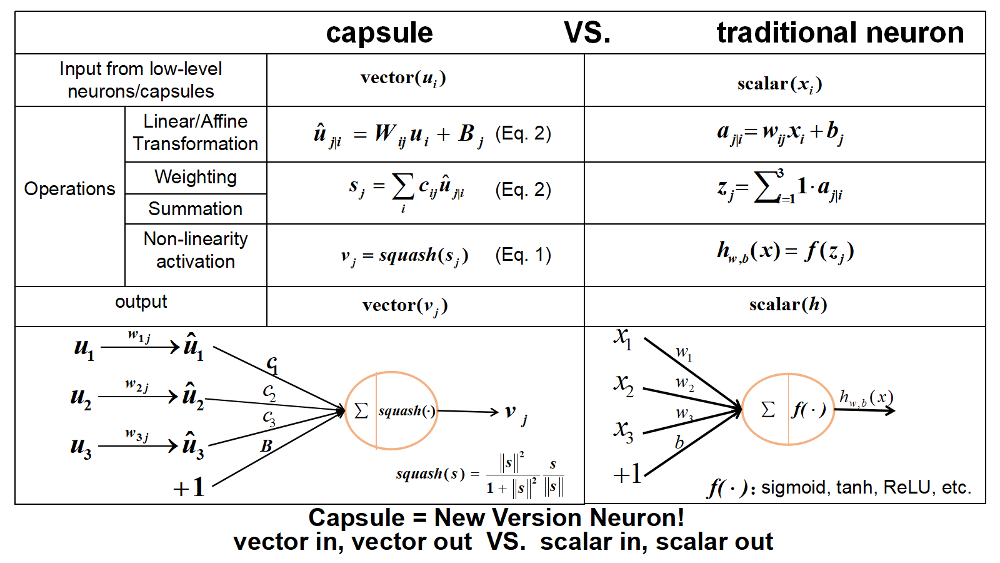
>https://github.com/naturomics/CapsNet-Tensorflow


- 各ニューロンがベクトルになっている
- バイアス項を用いていない
- プーリング層をdynamic routingというものに置き換えている
- 従来の関数と違い、squash関数を入れ、データを圧縮している


- Affine変換で、低いレベルのカプセル(目鼻口）と、高いレベル（顔）のカプセルを結びつけている(?)→と、書かれていることが多いが数式を見てもよくわかりませんね
- バイアス項がないのはなぜか
    - 以下疑問
    - バイアス項がないと表現の幅が狭まる
    - ベクトル×スカラーより、ベクトル×ベクトルの方がよくない？

- ベクトル×スカラーより、ベクトル（アダマール積）ベクトルの方がよくない？
→ベクトルに個別の値をかけると、ベクトルの向きや大きさも変わってしまうので、一つのベクトルには一つのスカラーをかける


- weightingのところは似た者同士の場合、値が大きくなる
    - 似た者同士とはベクトルの向きが似ている。
    - 内積を取ると大きくなる
    - 結びつきが強そうなcupsule間の係数cがどんどん１に、そうでない係数は0に近づく
- 

## dynamic routingとは

- 小カプセルの出力に重みをかけたものと親カプセルの出力の内積を取り、カプセルが揃っている親の方へ出力を受け渡すようにするもの
- 重みに関しては誤差逆伝播法で学習
- 小カプセルと親カプセルの結びつきに関しては自動的にupdateされる
- routingというハイパーパラメータがある


# カプセルという概念


- カプセルには仮想からの空間情報が保存される
- 画像特徴の場所が変化する時、認識の結果は変わらないが、空間情報が変わる。

## カプセルのおかげ得たもの

capsule →　オブジェクト  
大きさ　→　存在確率  
向き　→　特徴のプロパティ(方向やスケール、照明条件など、特徴の状態)  
位置　→　位置  




# モデル

## Input
入力層


## Primary Capsule Layer
際にオブジェクトが存在している位置のカプセルが大きくなる(ちょっとイミフだが出典はGIGAZINE)

## Routingu Capsule Layer
復数のカプセルを組み合わせて、複雑なオブジェクトを検出する層   
Routing by Agreementと呼ばれるアルゴリズムを用いる  
inとoutの内積値で低次カプセルから高次カプセルへの値の受け渡しを記述  


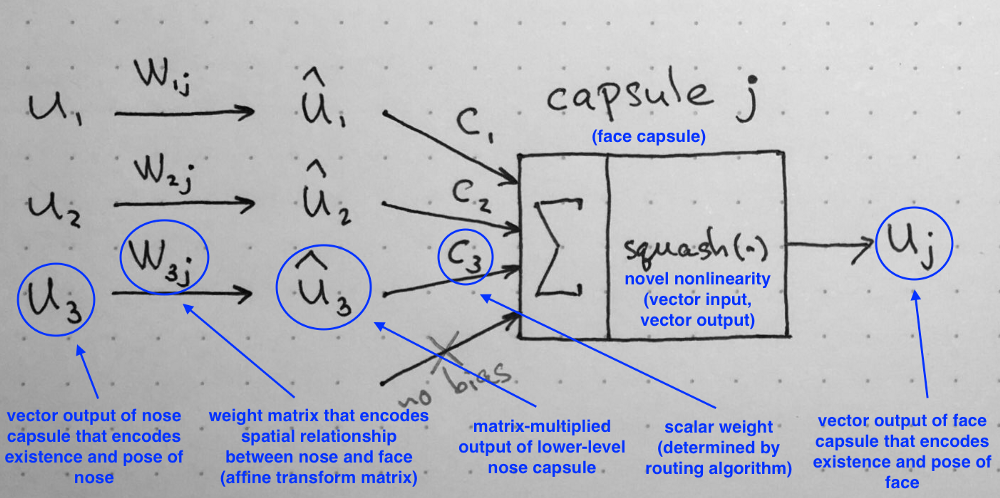
- wにはLow-Layerから入力された特徴の空間情報を保存する
- カプセルの重みcは、従来のCNNの重みのイメージ
- cの学習は誤差逆伝播法ではなく、DynamicRoutingの新しい手法を用いている


- convolution
- Caps net
- digit caps
- output



# Lossの話
https://mosko.tokyo/post/on-capusels/#fnref:2

## margin loss
★★数式は山崎さんのスライド内
- Tkは正解の場合は1,不正解の場合はわからないけど多分0~0.999のなかのどれか
- 入力xはvノルム
- 出力はmargin loss
- λがあるおかげで「オブジェクトがある方向に自信がある場合」の方が「オブジェクトがない方向に自信がある場合」よりもlossを小さくしようとしている




## reconstruction loss
- MSE



# CNNとの性能の比較

http://tekenuko.hatenablog.com/entry/2017/12/10/183414  
https://mosko.tokyo/post/on-capusels/#fnref:2  


affNistデータセットを用いた検証の結果、CapsNetの方が変換に対してロバストである  

数字が重なったデータセットMultiMNISTを用いた検証の結果、良い感じにらべるづけできた　→なんで？


データ量は少なくても良い精度が出るが、計算は時間がかかる？



CIFAR10はよい精度がでなかったらしい→　論文  


# 不明な点

- gigazineの矢印の図は1ピクセルごとにあるの？
- CapsNetでは画像のかさ増し時に回転させるとおかしくなるの？
- なんでweightingの時にバイアス項を無くす必要があったの？
- カプセル」ってそもそもなんですか？


## CNNの不明な点
- プーリング層がないとどんなふうに結果が悪くなるの？

# 参考

https://gigazine.net/news/20180208-capsnet/　　
https://qiita.com/onlyzs/items/5096f50a21758a536d9a　　
https://qiita.com/motokimura/items/cae9defed10cb5efeb62　　
https://qiita.com/onlyzs/items/5096f50a21758a536d9a　　



# コード

https://github.com/timomernick/pytorch-capsule  
https://github.com/motokimura/CapsNet-PyTorch  
https://github.com/naturomics/CapsNet-Tensorflow  
https://github.com/XifengGuo/CapsNet-Keras  
https://github.com/timomernick/pytorch-capsule  
